**Netflix Data Visualization**

The purpose of this project is to practice data visualization, using different library (Numpy, Pandas, Matplotlib, seaborn). Hopefully this project could tell a meaningful story. 

**This project made by:**

Ahmad Maulana Nur Pratama

Dimas Pradita

Other group member, no response in group chat.

disclaimer: This project was inspired by other people's work at kaggle.com. Because the creator not too familiar about different library and short of time

# **Data Preparation**

Import Library, Check Missing Values in Dataset

In [ ]:
#import library untuk analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import datetime as dt

In [ ]:
#change directory according to your file path
#Dataset downloaded from: https://www.kaggle.com/shivamb/netflix-shows

#Import Data
df = pd.read_csv('https://raw.githubusercontent.com/maulanapratamaa/DTSproject/main/netflix_titles.csv')
#Display three data
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [ ]:
#basic information about dataset (Number of Rows, Null Values and Data Types)
df.info(verbose = True) #Verbose: Prints information of all columns. So it looks neat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
#Percentage of missing data
for i in df.columns:
  percent_null = df[i].isna().sum() / len(df) * 100
  if percent_null > 0:
    print("{} null percentage: {}%".format(i,round(percent_null,2)))

director null percentage: 30.68%
cast null percentage: 9.22%
country null percentage: 6.51%
date_added null percentage: 0.13%
rating null percentage: 0.09%


There are 5 columns have missing values, with Director columns missing almost 1/3 of the data

# **Handling Missing Data**

Handling missing data is always scenario dependant, in this case i will:
*   replace blank countries with the most common country (mode)
*   keep director and cast as it is



In [ ]:
#Cleaning the data (drop null value and remove duplicate)
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No Data',inplace = True)
df['director'].replace(np.nan, 'No Data',inplace = True)

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
#make sure no missing values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


Our data from 7787, after cleaning become 7770 or we could say we remove 17 row.

After checking the info, missing values have been dealt with, however the date still incorect.

In [ ]:
#Change date data type
df['date_added']=pd.to_datetime(df['date_added'])

df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added']=df['date_added'].dt.year

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December,2018


# **Introduction about Netflix**

Netflix is a subscription-based streaming service that allows our members to watch TV shows and movies without commercials on an internet-connected device.
Netflix content varies by region and may change over time. You can watch from a wide variety of Netflix Originals, TV shows, movies, documentaries, and more. 

For simplicity, we devide into two types of content that is TV show and movies.

### **Netflix brand colors**

I'm going to implement netflix brand color palette, so it will look professional. reference: https://brand.netflix.com/en/assets/brand-symbol/

Text(0.5, 1.0, 'Brand Palette - Netflix')

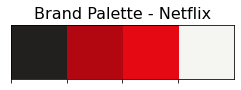

In [ ]:
#Color Palette
sns.palplot(['#221f1f','#b20710','#e50914','#f5f5f1'])

plt.title('Brand Palette - Netflix',loc='center',fontfamily='sans-serif',fontsize=16)

## **Netflix Brief History**


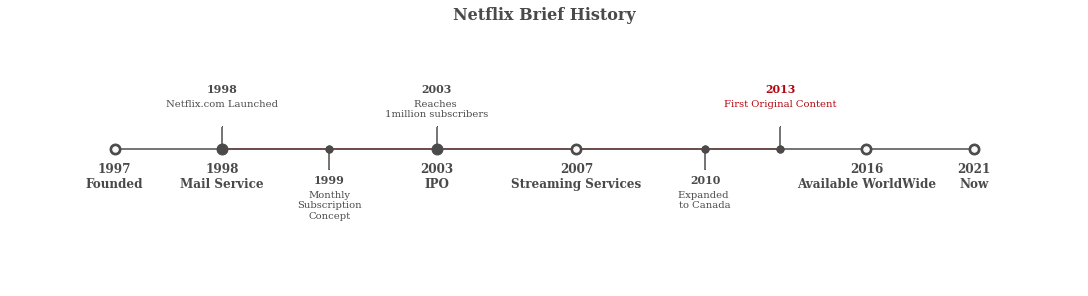

In [ ]:
#From other notebooks - https://www.kaggle.com/subinium/awesome-visualization-with-titanic-dataset

from datetime import datetime

#bagian bawah
tl_dates=[
    '1997\nFounded',
    '1998\nMail Service',
    '2003\nIPO',
    '2007\nStreaming Services',
    '2016\nAvailable WorldWide',
    '2021\nNow'
]
tl_x = [1,2,4,5.3,8,9]

#bagian atas
tl_sub_x = [2,3,4,6.5,7.2]

tl_sub_times = [
                '1998','1999','2003','2010','2013'
]
tl_text=[
         'Netflix.com Launched',
         'Monthly\nSubscription\nConcept',
         'Reaches \n1million subscribers',
         'Expanded \nto Canada',
         'First Original Content'

]

#Set Gambar dan Axis
fig,ax = plt.subplots(figsize=(15,4),constrained_layout=True)
ax.set_ylim(-2,1.75)
ax.set_xlim(0,10)

# Timeline : Garis
ax.axhline(0, xmin=0.1, xmax=0.9, c='#4a4a4a', zorder=1)
# Timeline : Date
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
# Timeline : Time
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)
#date text
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)

for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a',fontsize=12)

# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710', fontsize=11)
    
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', 
        fontfamily='serif',color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710')
    
# Spine
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 

# Title
ax.set_title("Netflix Brief History", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')
#ax.text(2.4,1.57,"From DVD rentals to a global audience of over 150m people - is it time for Netflix to Chill?", fontfamily='serif', fontsize=12, color='#4a4a4a')

plt.show()

# **Content Analysis**

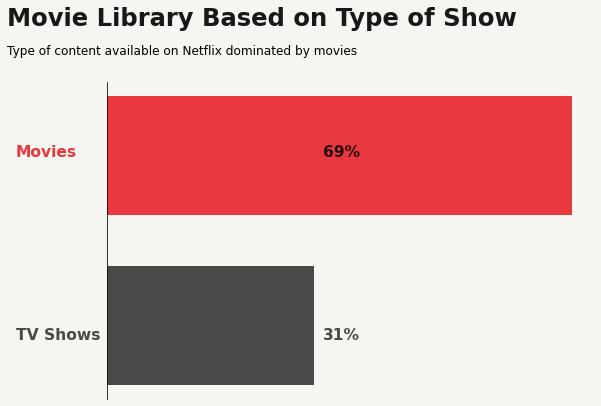

In [ ]:
#Counts of type column, and sort from bigger value to smaller value
x=df['type'].value_counts().sort_values(ascending=True)

#plotting grafik
fig, ax = plt.subplots(figsize = (9,6), dpi = 70)
fig.patch.set_facecolor('#f5f5f1')
ax.set_facecolor('#f5f5f1')

#Movies
ax.barh([1], x.values[1], height = 0.7, color = '#e50914', alpha = 0.8)
plt.text(-1050,1, 'Movies',{'weight':'bold','Size': '16','style':'normal', 'color':'#e50914'}, alpha = 0.8)
plt.text(2500,1, '69%',{'weight':'bold' ,'size':'16','color':'black'}, alpha = 0.8)

#TV Shows
ax.barh([0], x.values[0], height = 0.7, color = 'black', alpha = 0.7)
plt.text(-1050,-0.08, 'TV Shows', {'weight':'bold','Size': '16','style':'normal', 'color':'black'}, alpha = 0.7)
plt.text(2500,-0.08, '31%',{'weight':'bold','size':'16','color':'black'}, alpha = 0.7)

#Title and Subtitle
plt.text(-1150,1.77,'Movie Library Based on Type of Show',{'Size': '25','weight':'bold', 'color':'black'}, alpha = 0.9)
plt.text(-1150,1.6, 'Type of content available on Netflix dominated by movies', 
        {'size':'12.5','color': 'black'})

#Remove Border
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## **Analysis Based on Country**

We want to look at top content created by country, top 3 of country with the most content are USA, India and UK. 

In [ ]:
#Feature engineering
df['count'] = 1

#First Country
df['FirstCountry'] = df['country'].apply(lambda x:x.split(',')[0]) #split untuk memisahkan apabila terdapat multi country
df['FirstCountry'].head(5)

#Shorten Country name length
df['FirstCountry'].replace('United States','US',inplace=True)
df['FirstCountry'].replace('United Kingdom','UK',inplace=True)
df['FirstCountry'].replace('South Korea','S.Korea',inplace=True)

#redefine rating age
#we split 14 categories three age groups: kids, Teens, Adults. reference: https://help.netflix.com/en/node/2064/ca.

age_group = {
    'TV-PG': 'Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Kids',
    'TV-Y7': 'Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages']=df['rating'].replace(age_group)
df['target_ages'].unique()

array(['Adults', 'Teens', 'Kids'], dtype=object)

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


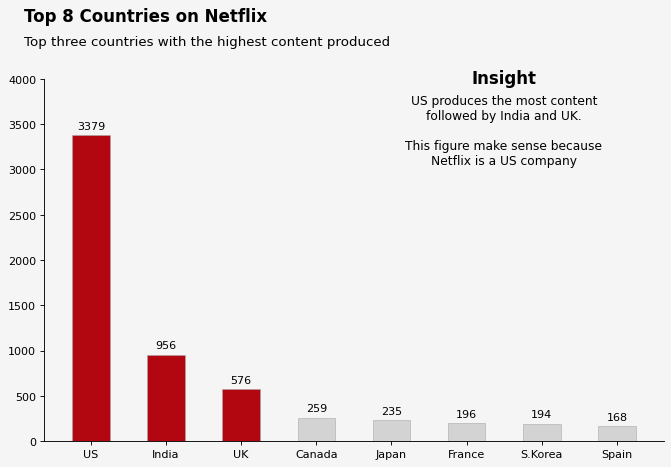

In [ ]:
#Barchart Visualisasi
#Sort from bigger value to smaller value, and take top 8
data=df.groupby('FirstCountry')['count'].sum().sort_values(ascending=False)[:8]

#Settings color bar
color_map = ['#d3d3d3' for _ in range(8)]
color_map[0] = color_map[1]=color_map[2] = '#b20710' #highlight top three

#Plot
fig,ax = plt.subplots(1,1,figsize=(10,6),dpi=80)
fig.patch.set_facecolor('#f6f5f5') #Light Gray
ax.set_facecolor('#f6f5f5')
ax.bar(data.index,data,width=0.5,edgecolor='darkgray',linewidth=0.5,color=color_map)

#annotations
for i in data.index:
  ax.annotate(f'{data[i]}',
              xy=(i,data[i]+100),
              va='center',ha='center',fontfamily='sans-serif',fontweight='light')
#Remove border
ax.axes.get_xaxis().set_visible(True)
ax.axes.get_yaxis().set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#tick labels
ax.set_xticklabels(data.index,fontfamily='sans-serif',rotation=0)

#title and subtitle
fig.text(0.1,1,'Top 8 Countries on Netflix',fontsize=15,fontfamily='sans-serif',fontweight='bold')
fig.text(0.1,0.95,'Top three countries with the highest content produced',fontsize=12,fontweight='light',fontfamily='sans-serif')
#insight
fig.text(0.7,0.87,'Insight',fontsize=15,fontweight='bold',fontfamily='sans-serif',ha='center')
fig.text(0.7,0.67,'''
US produces the most content
followed by India and UK.

This figure make sense because
Netflix is a US company
'''
,fontsize=11,fontweight='light',fontfamily='cursive',ha='center')

#gridline
#ax.grid(axis='y', linestyle='-', alpha=0.4)   
y_ticks = np.arange(0, 4500, 500) # y ticks, min, max, then step
ax.set_yticks(y_ticks)
ax.set_axisbelow(True)
plt.show()

**Type of Content Produces by each country**

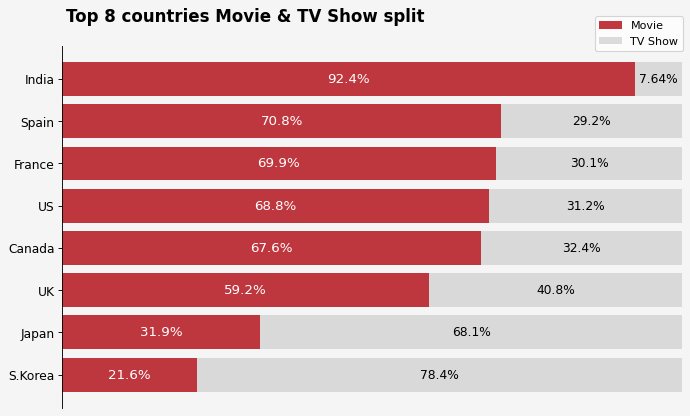

In [ ]:
#Top 8 country
CountryOrder=df['FirstCountry'].value_counts()[:8].index

data_Q2Q3=df[['type','FirstCountry']].groupby('FirstCountry')['type'].value_counts().unstack().loc[CountryOrder]
data_Q2Q3['sum']=data_Q2Q3.sum(axis=1)
#calculating Ratio
data_Q2Q3_ratio=(data_Q2Q3.T/data_Q2Q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=True)

#plotting stacked barchart
fig, ax = plt.subplots(1,1,figsize=(10, 6),dpi=80)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

ax.barh(data_Q2Q3_ratio.index, data_Q2Q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_Q2Q3_ratio.index, data_Q2Q3_ratio['TV Show'], left=data_Q2Q3_ratio['Movie'], 
        color='#d3d3d3', alpha=0.8, label='TV Show')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_Q2Q3_ratio.index, fontfamily='sans-serif', fontsize=11)

# movie annotation
for i in data_Q2Q3_ratio.index:
    ax.annotate(f"{data_Q2Q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_Q2Q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='sans-serif',
                   color='white')
#TV Show annotation
for i in data_Q2Q3_ratio.index:
    ax.annotate(f"{data_Q2Q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_Q2Q3_ratio['Movie'][i]+data_Q2Q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=11, fontweight='light', fontfamily='sans-serif',
                   color='black')

#title and subtitle
fig.text(0.13, 0.93, 'Top 8 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='sans-serif')   

#remove border
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(True)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#legend
ax.legend(bbox_to_anchor=(0.85, 0.97))
plt.show()

In [ ]:
#
data = df.groupby('FirstCountry')[['FirstCountry','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['FirstCountry']
df_heatmap = df.loc[df['FirstCountry'].isin(data)]

df_heatmap = pd.crosstab(df_heatmap['FirstCountry'],df_heatmap['target_ages'],normalize = "index").T

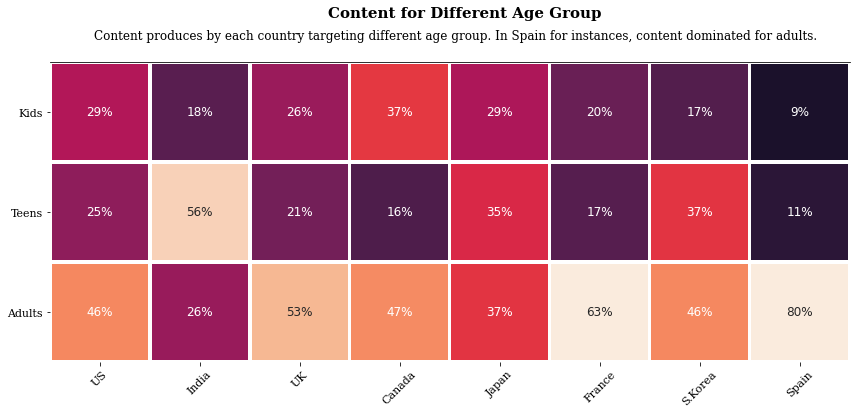

In [ ]:
#plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['US', 'India', 'UK', 'Canada', 'Japan', 'France', 'S.Korea', 'Spain']

age_order = ['Kids','Teens','Adults']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="rocket",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)

#title and subtitle
fig.text(.7, .725, 'Content for Different Age Group', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   
fig.text(0.95, 0.7, 'Content produces by each country targeting different age group. In Spain for instances, content dominated for adults.',ha='right', fontsize=12,fontfamily='serif') 
#tics
ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=45, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
plt.tight_layout()
plt.show()

# **Conclusion**

From this data, we could see that the top 3 contributor based on country are United States, India and United Kingdom.

*   United States - 70% content type are movies, with split different age group Adults **46%**, Teens **25%** and Kids **29%**
*   India - 90% content produced are movies, targeting different age group 26% Adults, Teens 56%, and Adults 26%
*   UK - 60% content produced are movies, targeting different age group 53% Adults, Teens 21%, and Adults 18%

**From this analysis, we could learn about what type of content and which age group each country would prefer.**


Thank You Very Much